# YouTube Comments - Scraping Data and NLP

We are often curious about what people think or comment on an event that occurs. For example, from a video uploaded on the internet, of course there are many responses received. Some people give support, criticize, and even give hate speech. Therefore, I randomly chose a video on YouTube trending. I would scrap the comments on the video to be labeled with sentiment and even predict the sentiment of a new comment given.
Here are the steps I did on this project:
1. Scraping data from the video page
2. Saving the data into a dataframe to perform analysis. 
3. Labeling comments into three categories (Neutral, Positive, and Negative). In this process I tried to use two methods.
   * TextBloob
   * KMeans Clustering
5. Evaluating the models.
6. Conclusion


# Scraping Data

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

In [20]:
url = 'https://www.youtube.com/watch?v=Ifr0ymBxOTs&t=6s'

In [23]:
driver = webdriver.Chrome()

In [24]:
driver.get(url)

In [25]:
time.sleep(5)

In [26]:
scroll_pause_time = 2  # Pause between scrolls
max_scroll_attempts = 150  # Maximum number of scroll attempts
scroll_attempts = 0

while scroll_attempts < max_scroll_attempts:
    # Scroll down to the bottom
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(scroll_pause_time)

    # Check if the "Show more" button exists and click it
    try:
        show_more_button = driver.find_element(By.XPATH, '//*[@id="continuations"]/yt-next-continuation/paper-button')
        show_more_button.click()
        time.sleep(scroll_pause_time)
    except:
        pass  # No "Show more" button found

    # Increment scroll attempts
    scroll_attempts += 1

In [45]:
comments = []
comment_sections = driver.find_elements(By.XPATH, '//*[@id="comment"]')
for comment in comment_sections:
    try:
        # Extract author name
        author = comment.find_element(By.XPATH, './/*[@id="author-text"]').text
        # Extract comment text
        text = comment.find_element(By.XPATH, './/*[@id="content-text"]').text
        # Extract likes (if available)
        likes = comment.find_element(By.XPATH, './/*[@id="vote-count-middle"]').text
        # Extract timestamp
        timestamp = comment.find_element(By.XPATH, './/*[@id="published-time-text"]').text
        # Append to the list
        comments.append([author, text, likes, timestamp])
    except Exception as e:
        # If any element is missing, skip the comment
        print(f"Error extracting comment: {e}")
        continue

In [47]:
df = pd.DataFrame(comments, columns=['Author', 'Comment', 'Likes', 'Timestamp'])
df

,Author,Comment,Likes,Timestamp
0,@johnThurgood-x7y,Foden is a player who thrives in dynamic condi...,,5 days ago
1,@matthewfsadni6439,Fearless..not scared to go a career without a ...,,6 days ago
2,@r2dad282,"""skewif"". I feel like ice cube/old man Capn Am...",,7 days ago
3,@gideongeorge4513,Even after winning by two goals He still said ...,1,8 days ago
4,@jsequine927,"Lewis Skelly: (laughs) off camera: “Declan, wh...",,9 days ago
...,...,...,...,...
928,@TrapsterJ,Foden needs to stop being forced into these te...,736,12 days ago
929,@FootballLatestOfficial,"if you want a number 10 to play well, then don...",20,12 days ago
930,@rickisunak,Nice to see Kane play like a striker for once!...,7,12 days ago (edited)
931,@benagamer,Rashford definitely did better than Foden. He ...,1.7K,12 days ago


In [49]:
df.to_csv('youtube_comments.csv', index=False)

# EDA

In [3]:
df = pd.read_csv('youtube_comments.csv')

In [5]:
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df['Comment_length'] = df['Comment'].apply(len)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Author          930 non-null    object
 1   Comment         933 non-null    object
 2   Likes           196 non-null    object
 3   Timestamp       933 non-null    object
 4   Comment_length  933 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 36.6+ KB


In [12]:
df.shape

(933, 5)

In [14]:
df['Timestamp'].value_counts()

Timestamp
12 days ago             619
11 days ago             215
12 days ago (edited)     40
10 days ago              39
11 days ago (edited)      9
9 days ago                6
5 days ago                1
6 days ago                1
7 days ago                1
8 days ago                1
10 days ago (edited)      1
Name: count, dtype: int64

In [11]:
df['Timestamp'].replace(['12 days ago (edited)','11 days ago (edited)','10 days ago (edited)'], ['12 days ago', '11 days ago','10 days ago'], inplace = True)
df['Timestamp'].value_counts()

Timestamp
12 days ago    659
11 days ago    224
10 days ago     40
9 days ago       6
5 days ago       1
6 days ago       1
7 days ago       1
8 days ago       1
Name: count, dtype: int64

In [13]:
import time

In [15]:
from datetime import datetime, timedelta

In [17]:
df['Timestamp'] = df['Timestamp'].apply(lambda x: int(x.split()[0]))
df['Date'] = df['Timestamp'].apply(lambda x: (datetime.today() - timedelta(days=x)).strftime('%d-%m-%Y'))

In [19]:
df = df.drop('Timestamp', axis = 1)
df.head()

,Author,Comment,Likes,Comment_length,Date
0,@johnThurgood-x7y,Foden is a player who thrives in dynamic condi...,NaN,606,04-04-2025
1,@matthewfsadni6439,Fearless..not scared to go a career without a ...,NaN,72,03-04-2025
2,@r2dad282,"""skewif"". I feel like ice cube/old man Capn Am...",NaN,85,02-04-2025
3,@gideongeorge4513,Even after winning by two goals He still said ...,1,134,01-04-2025
4,@jsequine927,"Lewis Skelly: (laughs) off camera: “Declan, wh...",NaN,57,31-03-2025


In [21]:
df[df['Likes'].str.contains('K', case=False, na=False)]

,Author,Comment,Likes,Comment_length,Date
548,@121Denz,"""More dribbling, less passing"" love that from ...",1K,101,28-03-2025
651,@ILUVITHERE_,Tuchel’s post-match interview shows he’s what ...,1.1K,170,28-03-2025
870,@Metaldamo,Foden never gets anywhere near the right wing ...,1K,65,28-03-2025
873,@terrytibbs386,The mainstream pundits are finally waking up o...,1.1K,94,28-03-2025
896,@marzipanmonkey,The problem with Foden is he is clearly SUCH a...,2K,294,28-03-2025
926,@SDD871,“We can do better” is more than Southgate ever...,4.1K,81,28-03-2025
931,@benagamer,Rashford definitely did better than Foden. He ...,1.7K,120,28-03-2025


In [23]:
df['Likes'].replace(['1K','1.1K','1.7K', '2K', '4.1K'], ['1000', '1100','1700', '2000', '41000'], inplace = True)
df[df['Likes'].str.contains('K', case=False, na=False)]

,Author,Comment,Likes,Comment_length,Date


In [25]:
df['Likes'] = df['Likes'].fillna('0').astype(int)

In [27]:
df.head()

,Author,Comment,Likes,Comment_length,Date
0,@johnThurgood-x7y,Foden is a player who thrives in dynamic condi...,0,606,04-04-2025
1,@matthewfsadni6439,Fearless..not scared to go a career without a ...,0,72,03-04-2025
2,@r2dad282,"""skewif"". I feel like ice cube/old man Capn Am...",0,85,02-04-2025
3,@gideongeorge4513,Even after winning by two goals He still said ...,1,134,01-04-2025
4,@jsequine927,"Lewis Skelly: (laughs) off camera: “Declan, wh...",0,57,31-03-2025


In [36]:
df.describe()

,Likes,Comment_length
count,933.000000,933.000000
mean,58.472669,107.628081
std,1346.980444,137.078405
min,0.000000,2.000000
25%,0.000000,40.000000
50%,0.000000,71.000000
75%,0.000000,128.000000
max,41000.000000,2515.000000


In [27]:
df.corr(numeric_only = True)

,Likes,Comment_length
Likes,1.000000,-0.003761
Comment_length,-0.003761,1.000000


<Axes: xlabel='Date', ylabel='count'>

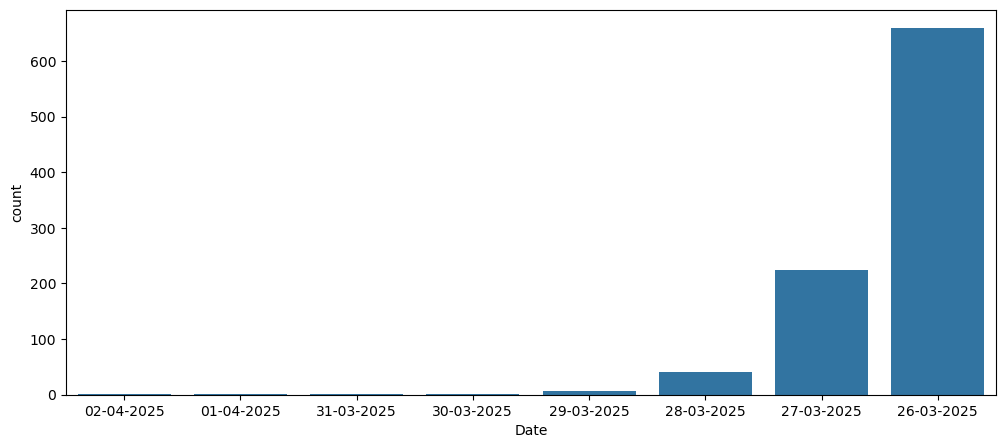

In [40]:
plt.figure(figsize=(12,5))
sns.countplot(df, x = 'Date')

<Axes: >

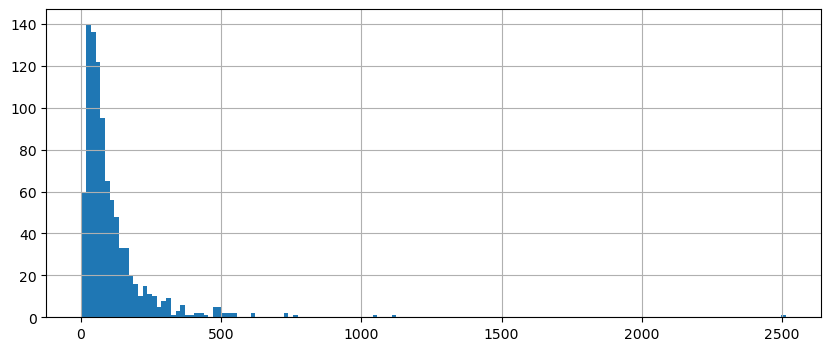

In [42]:
plt.figure(figsize=(10,4))
df['Comment_length'].hist(bins=150)

# Preparing the data

In [35]:
# Cleaning the comments
import re
import string

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

def remove_punct(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [37]:
df['Comment'] = df['Comment'].apply(lambda x: remove_punct(x))
df['Comment'] = df['Comment'].apply(lambda x: remove_URL(x))

In [39]:
df.head()

,Author,Comment,Likes,Comment_length,Date
0,@johnThurgood-x7y,Foden is a player who thrives in dynamic condi...,0,606,04-04-2025
1,@matthewfsadni6439,Fearlessnot scared to go a career without a ma...,0,72,03-04-2025
2,@r2dad282,skewif I feel like ice cubeold man Capn Americ...,0,85,02-04-2025
3,@gideongeorge4513,Even after winning by two goals He still said ...,1,134,01-04-2025
4,@jsequine927,Lewis Skelly laughs off camera “Declan what’s ...,0,57,31-03-2025


# Using TextBlob

We don't need to remove the stopwords when using textBlob. So, we can use the data directly.

In [41]:
from textblob import TextBlob

In [43]:
def get_sentiment(comment, threshold=0.1):
    polarity = TextBlob(comment).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

In [45]:
df['Sentiment'] = df['Comment'].apply(get_sentiment)

Now, checking manualy the output.

In [47]:
print('Positive')
print(df[df['Sentiment']=='Positive']['Comment'].head(15))
print('\n')
print('Negative')
print(df[df['Sentiment']=='Negative']['Comment'].head(15))
print('\n')
print('Neutral')
print(df[df['Sentiment']=='Neutral']['Comment'].head(15))
print('\n')

Positive
1     Fearlessnot scared to go a career without a ma...
3     Even after winning by two goals He still said ...
5     So why wasn’t Foden played on the left and Ras...
10                                           Love Keane
11    Palmer and Saka would start that right hand si...
12    I think there’s a bit of learning here for Sou...
16    This is it—XAI53K is the gamechanger we’ve bee...
17    Starting to see why every Chelsea fan fell in ...
18    Why does anyone think that football is importa...
20      Foden has done nothing his whole England career
23    England have got a brilliant squad \nThe 11 be...
25    400 Phil Foden is The Incredible Invisible Man...
31    Honeslty In Tuchel I trust He’s actually gonna...
32    Foden looks like a boy playing against men in ...
33        Fantastic video really appreciate your effort
Name: Comment, dtype: object


Negative
61     Next game Tuchel start Gordon as a LW en Bowen...
63     Frauden will never perform outside of a billio.

In [125]:
df['Sentiment'] = df['Comment'].apply(get_sentiment)

In [65]:
df.head()

,Author,Comment,Likes,Comment_length,Date,Sentiment
0,@johnThurgood-x7y,Foden is a player who thrives in dynamic condi...,0,606,04-04-2025,Neutral
1,@matthewfsadni6439,Fearlessnot scared to go a career without a ma...,0,72,03-04-2025,Positive
2,@r2dad282,skewif I feel like ice cubeold man Capn Americ...,0,85,02-04-2025,Neutral
3,@gideongeorge4513,Even after winning by two goals He still said ...,1,134,01-04-2025,Positive
4,@jsequine927,Lewis Skelly laughs off camera “Declan what’s ...,0,57,31-03-2025,Neutral


In [127]:
df['Sentiment'].value_counts()

Sentiment
Neutral     450
Positive    343
Negative    140
Name: count, dtype: int64

# KMeans Clustering

Comments are grouped using the clustering method. Then checked manually to label each cluster. When using KMeans Clustering, we need to remove the stopword.

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [69]:
from nltk.corpus import stopwords

In [79]:
stop = set(stopwords.words("english"))

In [73]:
def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

In [81]:
df['Comment'] = df['Comment'].apply(lambda x: remove_stopwords(x))

In [83]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['Comment'])

In [85]:
kmeans = KMeans(n_clusters=3, random_state=101)
df['Cluster'] = kmeans.fit_predict(X)

In [87]:
for i in range(3):
    print(f"\nCluster {i} sample comments:")
    print(df[df['Cluster'] == i]['Comment'].head(20))


Cluster 0 sample comments:
0     foden player thrives dynamic conditions suit g...
6     swear southgate balls drop foden england would...
8                      saka back gordan left saka right
9                                       foden overrated
11    palmer saka would start right hand side… due i...
15             morgan rogers started instead phil foden
19    im making excuses foden tuchel says wants wing...
20              foden done nothing whole england career
21                               phil foden fraud watch
24    foden doesn’t play wing plays bellinghams posi...
25    400 phil foden incredible invisible man doesn’...
27    typical nonsense england foden hasnt performed...
29                                            mgw foden
32    foden looks like boy playing men england shirt...
38    englands full team foden won’t get look palmer...
58    foden robotic system player cant play outside ...
60    foden played number 10 mancity many games seas...
76                  


By reading some comments on each cluster, it can be determined that cluster 0 is Negative, cluster 1 is Positive, and cluster 2 is Neutral.


In [91]:
df['Cluster'].replace([0,1,2], ['Negative', 'Positive','Neutral'], inplace = True)
df.head()

,Author,Comment,Likes,Comment_length,Date,Sentiment,Cluster
0,@johnThurgood-x7y,foden player thrives dynamic conditions suit g...,0,606,04-04-2025,Neutral,Negative
1,@matthewfsadni6439,fearlessnot scared go career without major tro...,0,72,03-04-2025,Positive,Positive
2,@r2dad282,skewif feel like ice cubeold man capn american...,0,85,02-04-2025,Neutral,Positive
3,@gideongeorge4513,even winning two goals still said boys need be...,1,134,01-04-2025,Positive,Positive
4,@jsequine927,lewis skelly laughs camera “declan what’s ebay”,0,57,31-03-2025,Neutral,Positive


In [93]:
df['Cluster'].value_counts()

Cluster
Positive    621
Negative    263
Neutral      49
Name: count, dtype: int64

# Evaluating the Models

* TextBlob

In [129]:
from sklearn.model_selection import train_test_split

In [147]:
X = df['Comment']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [151]:
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [153]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [155]:
model.fit(X_train_vect, y_train)

LogisticRegression()

In [157]:
y_pred = model.predict(X_test_vect)

In [143]:
from sklearn.metrics import classification_report, confusion_matrix

In [159]:
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.60      0.07      0.13        42
     Neutral       0.62      0.88      0.73       138
    Positive       0.76      0.61      0.68       100

    accuracy                           0.66       280
   macro avg       0.66      0.52      0.51       280
weighted avg       0.67      0.66      0.62       280



[[  3  36   3]
 [  1 121  16]
 [  1  38  61]]


This method is biased toward the Neutral class. Both Positive and Negative class have lot missclassified predictions as Neutral. Very poor recall (0.07): only 3 out of 42 correctly predicted. So, we can say that this model is doing okay with Positive and Neutral, but failing at Negative.

* KMeans Custering

In [261]:
from sklearn.model_selection import train_test_split

In [161]:
X = df['Comment']
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [165]:
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [167]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [169]:
model.fit(X_train_vect, y_train)

LogisticRegression()

In [171]:
y_pred = model.predict(X_test_vect)

In [283]:
from sklearn.metrics import classification_report, confusion_matrix

In [173]:
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.95      0.91      0.93        81
     Neutral       1.00      0.08      0.15        12
    Positive       0.93      1.00      0.96       187

    accuracy                           0.94       280
   macro avg       0.96      0.67      0.68       280
weighted avg       0.94      0.94      0.92       280



[[ 74   0   7]
 [  4   1   7]
 [  0   0 187]]


Strong performance on both Positive and Negative, especially impressive recall and F1. Huge issue on Neutral class — even though it has perfect precision, the recall is only 0.08. This means the model is very conservative about predicting Neutral — only says "Neutral" when it's very sure, but mostly misses it.

# Conclusion

Overall accuracy of both models are looked so different. We can say that KMeans Clustering is more accurate than TextBob to this dataset. It may happens because the dataset is small, only 933 rows. If the dataset is bigger we may get a bigger accuracy if we use TextBlob.